# Spotify Data Analysis

Robert Hall

Data Exploration using Python (STA 4243), Final Project

In [11]:
import pandas as pd
data = pd.read_csv('spotify_songs.csv')
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [12]:
data.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

### Top 5 Artists In Terms of Highest Average track_popularity Score:

Robert Hall

In [13]:
# dataframe containing only features track_artist, track_popularity
artist_scores = data[['track_artist', 'track_popularity']]

# check for null values
artist_scores.isnull().sum()

track_artist        5
track_popularity    0
dtype: int64

In [14]:
# drop instances where track_artist is null
artist_scores = artist_scores.dropna(subset=['track_artist'])

# check once again for null values
artist_scores.isnull().sum()

track_artist        0
track_popularity    0
dtype: int64

In [15]:
# generate the dataframe of average artist scores, in descending order
highest_scores = artist_scores.groupby('track_artist')['track_popularity'].mean().reset_index()

# sort highest scores in descending order
highest_scores = highest_scores.sort_values(by='track_popularity', ascending=False)

# get the top 5 scores
highest_scores  = highest_scores[0:5]

# round track_popularity to 2 decimal places
highest_scores['track_popularity'] = round(highest_scores['track_popularity'], 2)

# rename columns to more apt titles
highest_scores.rename(columns={'track_artist': 'Artist',
                               'track_popularity': 'Average Popularity Score'})

,Artist,Average Popularity Score
9735,Trevor Daniel,97.00
10242,Y2K,91.00
2601,Don Toliver,90.71
7959,Roddy Ricch,88.21
2209,DaBaby,87.86


#### The top 5 Highest Average Popularity Scores Belong To:

1) Trevor Daniel        (97.00)
2) Y2K                  (91.00)
3) Don Toliver          (90.71)
4) Roddy Ricch          (88.21)
5) DaBaby               (87.86)

### Linear model to predict 'energy' score given 'loudness' score

Robert Hall

In [16]:
data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [17]:
spotify_subset = pd.get_dummies(data, columns=['playlist_genre'], prefix='genre')

In [18]:
# import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# define input features and prediction variable
X = data[['loudness']]
y = data['energy']

# split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

# build and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# get predicted values
y_pred = model.predict(X_test)

In [19]:
# print coefficient, intercept, and regression line equation
print(f"Coefficient:        {model.coef_[0]}")
print(f"Intercept:          {model.intercept_}")
print(f"Regression Line:    y = {round(model.coef_[0], 2)}x + {round(model.intercept_, 2)}")

Coefficient:        0.040756744439105444
Intercept:          0.9724109383564337
Regression Line:    y = 0.04x + 0.97


In [20]:
# test error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(f"Mean Absolute Error:        {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error:         {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score:                  {r2_score(y_test, y_pred)}")

Mean Absolute Error:        0.10593066643023094
Mean Squared Error:         0.017707548185462205
R^2 Score:                  0.4652664435315529


Text(0, 0.5, 'Energy Score')

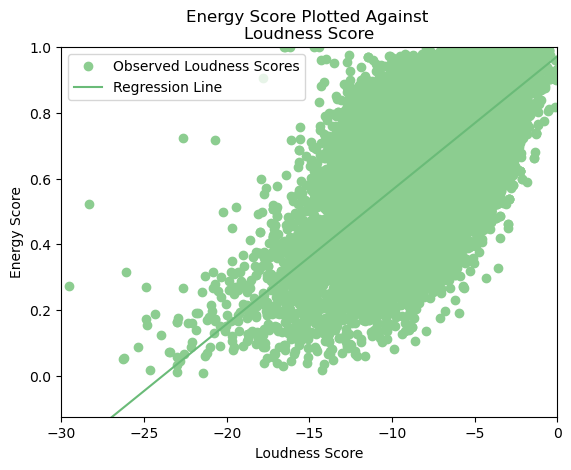

In [21]:
# generate scatterplot with regression line for predicted energy score given loudness score
import matplotlib.pyplot as plt
import seaborn as sns

# used for matched length
pred_y = model.predict(X)

# create dataframe for plot
plot_df = pd.DataFrame({"Loudness": X['loudness'],
                        "Actual Energy": y,
                        "Predicted Energy": pred_y})

sns.set_palette('Greens_d')

# Create scatter plot for observed data points
ax = plot_df.plot(x='Loudness', y='Actual Energy', style='o', label='Observed Loudness Scores')

# Create line plot for the fitted line
plot_df.sort_values('Loudness', inplace=True)
plot_df.plot(x='Loudness', y='Predicted Energy', kind='line', ax=ax, label='Regression Line')
plt.ylim(-0.125, 1)
plt.xlim(-30, 0)

# Add titles and labels
ax.set_title('Energy Score Plotted Against \nLoudness Score')
ax.set_xlabel('Loudness Score')
ax.set_ylabel('Energy Score')

### Linear Model to Predict Popularity Score Against Song Duration

Max Moran, Robert Hall

In [22]:
# import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# create new feature 'duration_min' out of 'duration_ms'
data['duration_min'] = data['duration_ms'] / 60000

# define input features and prediction variable
X = data[['duration_min']]
y = data['track_popularity']

# split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

# build and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# get predicted values
y_pred = model.predict(X)

Text(0, 0.5, 'Track Popularity')

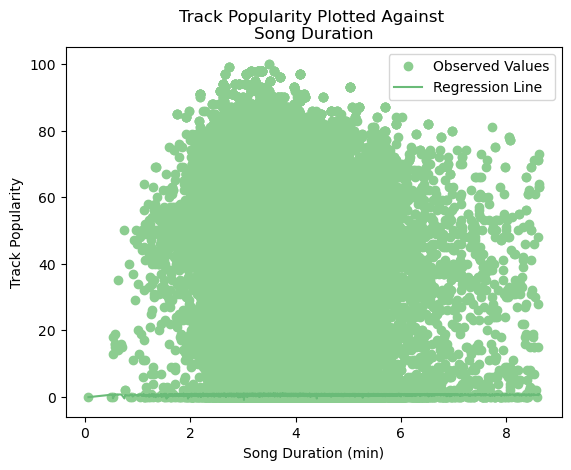

In [23]:
# create dataframe for plot
plot_df = pd.DataFrame({"Duration (min)": X['duration_min'],
                        "Actual Popularity": y,
                        "Predicted Popularity": pred_y})

sns.set_palette('Greens_d')

# Create scatter plot for observed data points
ax = plot_df.plot(x='Duration (min)', y='Actual Popularity', style='o', label='Observed Values')

# Create line plot for the fitted line
plot_df.sort_values('Duration (min)', inplace=True)
plot_df.plot(x='Duration (min)', y='Predicted Popularity', kind='line', ax=ax, label='Regression Line')
#plt.ylim(-0.125, 1)
#plt.xlim(-30, 0)

# Add titles and labels
ax.set_title('Track Popularity Plotted Against \nSong Duration')
ax.set_xlabel('Song Duration (min)')
ax.set_ylabel('Track Popularity')

In [24]:
print(r2_score(y, y_pred))

0.020616844715335647
